In [43]:
#imported packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")
install.packages("gridExtra")
install.packages("corrplot")
install.packages("car")
install.packages("olsrr")
install.packages("recipes")
library(recipes)
library(olsrr)
library(car)
library(corrplot)
library(gridExtra)
library(ggplot2)
library(dplyr)
library(GGally)
library(patchwork)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages


installiere auch Abh"angigkeiten 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'progressr', 'SQUAREM', 'data.table', 'diagram', 'lava', 'tzdb', 'prodlim', 'timechange', 'clock', 'gower', 'hardhat', 'ipred', 'lubridate', 'timeDate'





Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages



Attache Paket: 'recipes'


Das folgende Objekt ist maskiert 'package:stats':

    step




In [132]:
#input dataset
car_data <- read.csv("data/CarPrice.csv")
head(car_data)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250



Table1: car data

The dataset includes 205 rows and 26 columns. It has no missing values and no duplicate values, ensuring data quality for machine learning purposes.
The dataset originally contains 25 covariates, but some of them are redundant or challenging to interpret. For example, features like car
width, car height, car length, and car weight all
represent similar car's attributes. To reduce redundancy, we decided to
keep one of these attributes that best represents the car's size. Additionally, features such as car_ID and symboling are
difficult to interpret and do not appear to provide meaningful
information about the car's characteristics. These features were deemed irrelevant to our analysis, so we drop these features. After filtering, the dataset now contains 14 relevant features(includes
output), improving both interpretability and focus for analysis.



* The dataset was published in 2019. The exact timeframe of data collection is not specified. 
All features are measured in U.S. customary units, and all data points are from vehicles in the U.S.


| Variable  | Type               | Description                                   | Unit          
|-----------|--------------------|-----------------------------------------------|---------------|
| fueltype  | Binary Categorical | The type of fuel the car uses: "gas" or "diesel" |
| aspiration  | Categorical | the type of aspiration used in the car's engine |
| doornumber  | Categorical | the number of doors on the car |
| carbody     | Categorical | the body style of the car |
| drivewheel  | Cateogrical | the drive wheel type of car |
| enginelocation | Categorical | the location of the engine in the car |
| carlength | Numerical | the overall length of the car | inch |
| enginesize | Numerical | the size of the engine |  cubic inches |
| cylindernumber | Categorical | the number of cylinders in the car's engine |
| fuelsystem | Categorical | the type of fuel system used in car |
| horsepower | Numerical | the power of the engine |  hp |
| peakrpm | Numerical | the engine's maximum revolution per minute at the peak power | peak revolutions per minute |
| citympg | Numerical | the fuel efficiency in miles per gallon driving in city| miles per gallo |
|price | Numerical | the price of the car | US dollar |


*  What are the key features that contribute to the highest accuracy of car price predictions in a multiple linear regression model using forward selection and cross validation?



 The Chinese automobile company Geely Auto aims to enter the U.S. market by establishing a local manufacturing facility and producing cars domestically. A high accuracy predictive model can help Geely Auto to determine their pricing strategy based on the specific car features in the competitive U.S. market. This analysis will not only identify which features American consumers value the most but also demonstrate how these features impact car prices. By understanding the influence of car features, Geely Auto can succesfully price their new cars to match with market expectations, ensuring their entry into the U.S. market is aligned with consumer preferences.


In [133]:
selected_columns <- c("fueltype", "aspiration", "doornumber","drivewheel", 
                      "enginelocation", "carlength", "enginesize", "cylindernumber", 
                    "horsepower", "peakrpm", "citympg", "price")

car_data <- car_data[selected_columns]


head(car_data)

,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,enginesize,cylindernumber,horsepower,peakrpm,citympg,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<dbl>
1,gas,std,two,rwd,front,168.8,130,four,111,5000,21,13495
2,gas,std,two,rwd,front,168.8,130,four,111,5000,21,16500
3,gas,std,two,rwd,front,171.2,152,six,154,5000,19,16500
4,gas,std,four,fwd,front,176.6,109,four,102,5500,24,13950
5,gas,std,four,4wd,front,176.6,136,five,115,5500,18,17450
6,gas,std,two,fwd,front,177.3,136,five,110,5500,19,15250


Table 2: filtered car data

In [134]:
summary(car_data)


   fueltype          aspiration         doornumber         drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 enginelocation       carlength       enginesize    cylindernumber    
 Length:205         Min.   :141.1   Min.   : 61.0   Length:205        
 Class :character   1st Qu.:166.3   1st Qu.: 97.0   Class :character  
 Mode  :character   Median :173.2   Median :120.0   Mode  :character  
                    Mean   :174.0   Mean   :126.9                     
                    3rd Qu.:183.1   3rd Qu.:141.0                     
                    Max.   :208.1  



### Questions:
* What are the key features that contribute the most to the accuracy of car price predictions in a multiple linear regression model using forward selection?




# Data Visualization:

In [135]:
#check if there is any missing value
missing_value <- sum(is.na(car_data))
missing_value

[1] 0

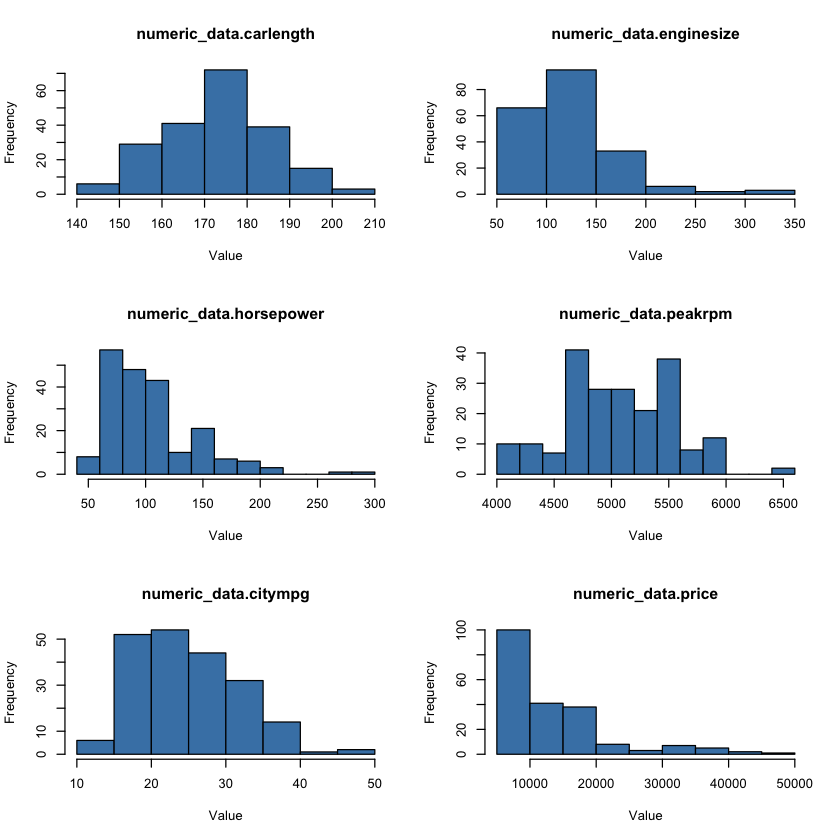

In [136]:
numeric_data <- car_data %>% select_if(is.numeric)

par(mfrow = c(3, 2))
car_data_n <- data.frame(
  numeric_data$carlength,
  numeric_data$enginesize,
  numeric_data$horsepower,
  numeric_data$peakrpm,
  numeric_data$citympg,
  numeric_data$price
)

for (i in 1:ncol(car_data_n)) {
  hist(car_data_n[[i]], main = colnames(car_data_n)[i], xlab = "Value", col = "steelblue", border = "black")
}



It seems that the distribution of horsepower and engine size are all scaled. To reduce the risk of violating the assumption and improve the model performance, we decide to transform these two feature.

In [187]:
car_data$horsepower <- log(car_data$horsepower)
car_data$enginesize <- log(car_data$enginesize)


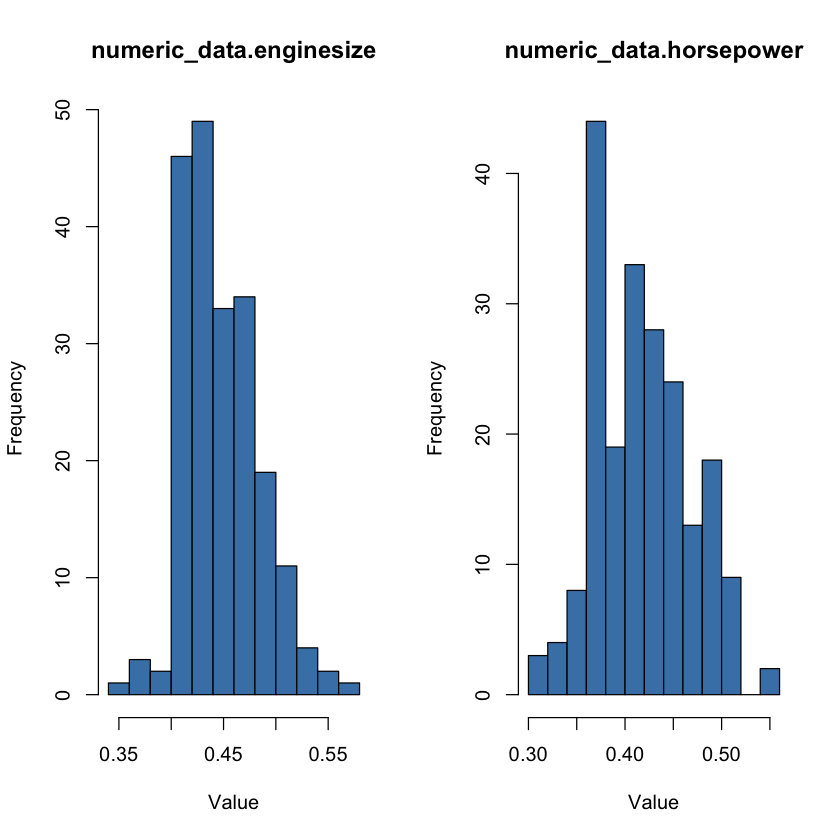

In [200]:


par(mfrow = c(1, 2))
car_data_n <- data.frame(
  numeric_data$enginesize,
  numeric_data$horsepower
)

for (i in 1:ncol(car_data_n)) {
  hist(car_data_n[[i]], main = colnames(car_data_n)[i], xlab = "Value", col = "steelblue", border = "black")
}

Figure 1: the distributions for numeric features

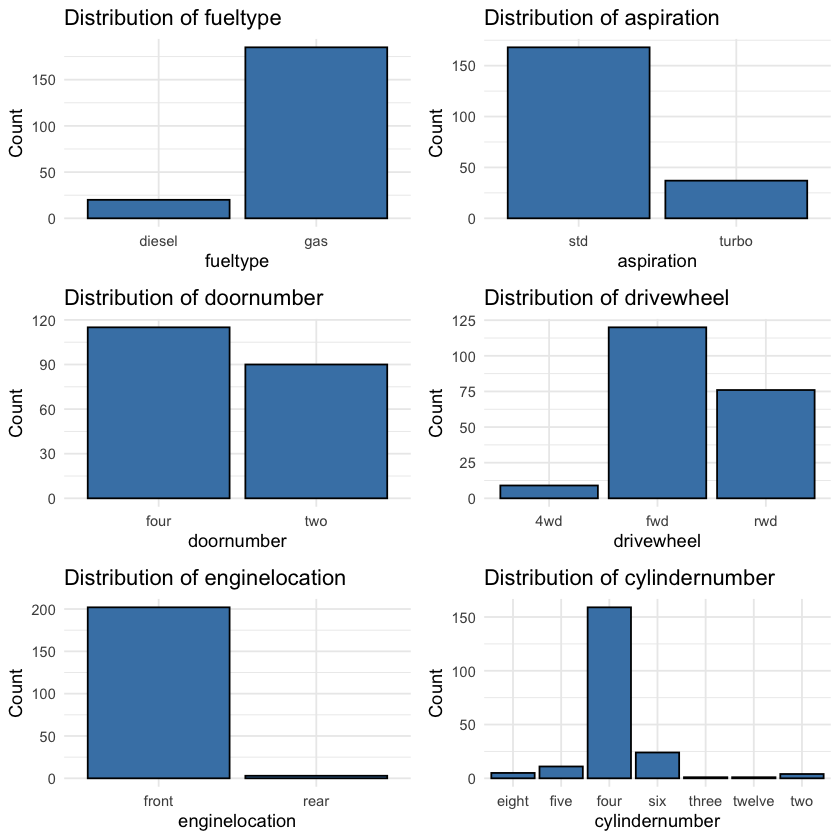

In [170]:
plots <- list()
categorical_columns <- c('fueltype','aspiration','doornumber','drivewheel','enginelocation','cylindernumber')

for (cat_col in categorical_columns) {
  p <- ggplot(car_data, aes_string(x = cat_col)) +
    geom_bar(fill = "steelblue", color = "black") +
    labs(title = paste("Distribution of", cat_col), x = cat_col, y = "Count") +
    theme_minimal()
  
  plots[[cat_col]] <- p 
}

grid.arrange(grobs = plots, ncol = 2)

Figure 2: the distributions for encoded categorical features

In [ ]:
#we choose several categorial features to use boxplot to visualize

#box plot for aspiration
plot1 <- ggplot(car_data, aes(x = aspiration, y = price, fill = aspiration)) +
  geom_boxplot() +
  labs(title = "Price Distribution by Aspiration", x = "Aspiration", y = "Price") +
  theme_minimal()
#box plot for fuel type
plot2 <-ggplot(car_data, aes(x = fueltype, y = price, fill = fueltype)) +
  geom_boxplot() +
  labs(title = "Price Distribution by fuel type", x = "fuel type", y = "Price") +
  theme_minimal()



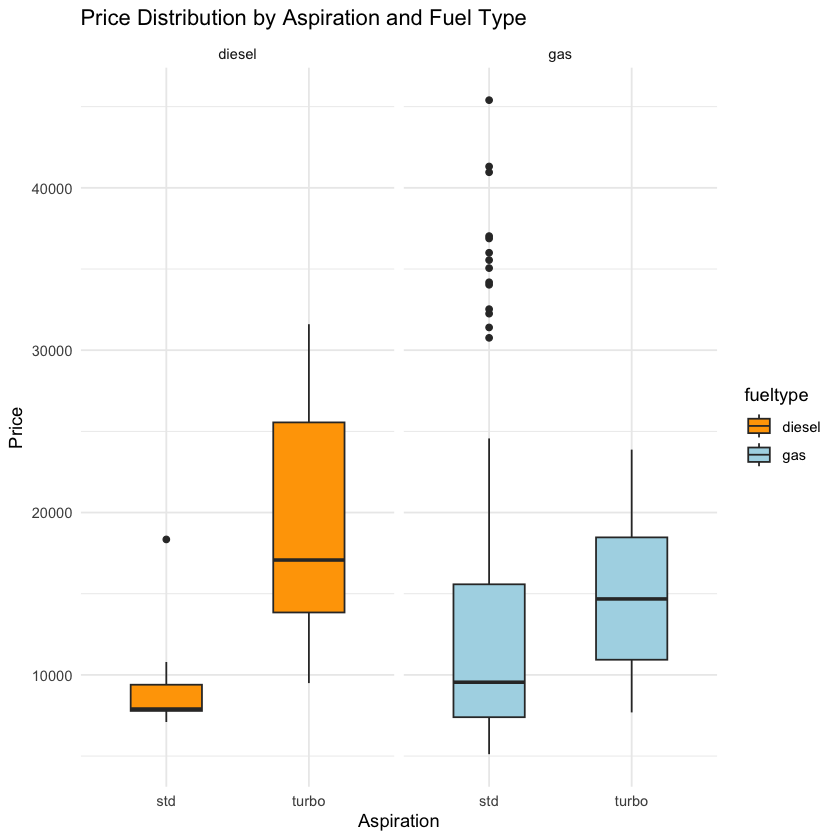

In [138]:
# boxplot for aspiration under different fueltype
plot4 <- ggplot(car_data, aes(x = aspiration, y = price, fill = fueltype)) + 
  geom_boxplot(width = 0.5) +
  facet_wrap(~ fueltype) + 
  scale_fill_manual(values = c("gas" = "lightblue", "diesel" = "orange")) +  
  labs(title = "Price Distribution by Aspiration and Fuel Type", x = "Aspiration", y = "Price") +
  theme_minimal()

plot4

# Investigate Multicollinearity:

In [179]:

#encode the categorical features
non_numeric_data <- car_data %>% select_if(Negate(is.numeric))
 

car_data_new <- car_data
car_data_new$fueltype <- as.numeric(factor(car_data$fueltype))
car_data_new$aspiration <- as.numeric(factor(car_data$aspiration))
car_data_new$doornumber <- as.numeric(factor(car_data$doornumber))
car_data_new$drivewheel <- as.numeric(factor(car_data$drivewheel))
car_data_new$enginelocation <- as.numeric(factor(car_data$enginelocation))
car_data_new$cylindernumber <- as.numeric(factor(car_data$cylindernumber))
car_data_new$enginelocation <- as.numeric(factor(car_data$enginelocation))





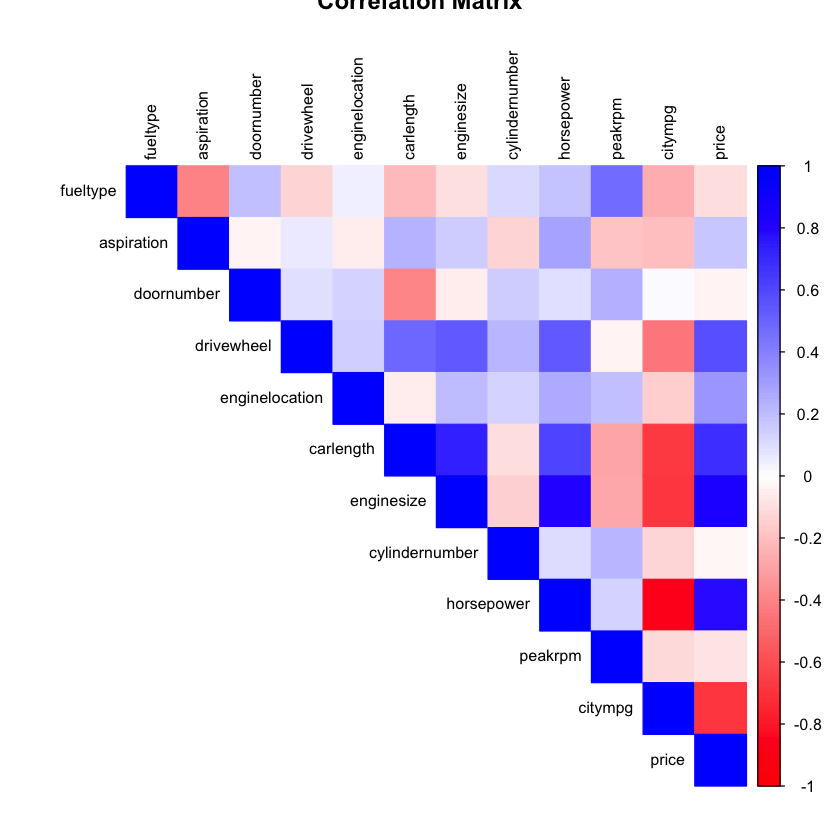

In [180]:
# Compute the correlation matrix
cor_matrix <- cor(car_data_new, use = "complete.obs")

# Visualize the correlation matrix with corrplot
corrplot(cor_matrix, 
         method = "color",          # Color-coded representation
         type = "upper",            # Show only upper triangle
         tl.col = "black",          # Text label color
         tl.cex = 0.8,              # Text label size
         col = colorRampPalette(c("red", "white", "blue"))(200),
         title = "Correlation Matrix")


figure : correlation matrix

* horsepower and enginesize are highly correlated
* horsepower and citympg are highly correlated
* enginesize and citympg are highly correlated
* carlength and citympg are highly correlated

To further investigate, we compute VIF for each feature. 

In [181]:
# calculate the VIF for each feature

vif_model <- lm(price ~ ., data = car_data_new)
vif_vals <- vif(vif_model)
vif_df <- data.frame(
  Variable = names(vif_vals),
  VIF = vif_vals
)
vif_df

,Variable,VIF
,<chr>,<dbl>
fueltype,fueltype,2.778950
aspiration,aspiration,2.524425
doornumber,doornumber,1.654195
drivewheel,drivewheel,1.892568
enginelocation,enginelocation,1.296689
carlength,carlength,5.120520
enginesize,enginesize,10.813389
cylindernumber,cylindernumber,1.589787
horsepower,horsepower,16.464213


table 3: VIF for each feature

It seems that the VIFs for horsepower and enginesize are larger than 10. It would be benefitial if we drop these features to reduce the risk of causing multicollinearity 

In [182]:
car_data_new <- car_data_new %>% select(-horsepower, - enginesize)


# Perform Forward Feature Selection:

In [188]:
library(leaps)
install.packages("rsample")
library(rsample)

car_split <- initial_split(car_data_new, prop = 0.7, strata = price)
car_selection <-  training(car_split)
car_model <- testing(car_split)





Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//RtmpdoB8Rz/downloaded_packages


To avoid the post inference problem, we split our data into selection set and model building set, and the forward selection will be run on the selection set. 

In [189]:
forward_select <- regsubsets(
  x = price ~ .,      
  nvmax = 10,        
  data = car_selection, 
  method = "forward" 
)

forward_sum_select <- summary(forward_select)

fwd_summary_df_select <- data.frame(
  n_input_variables = 1:9,         
  RSQ = forward_sum_select$rsq,   
  ADJ.R2 = forward_sum_select$adjr2
)
forward_sum_select
fwd_summary_df_select

Subset selection object
Call: regsubsets.formula(x = price ~ ., nvmax = 10, data = car_selection, 
    method = "forward")
9 Variables  (and intercept)
               Forced in Forced out
fueltype           FALSE      FALSE
aspiration         FALSE      FALSE
doornumber         FALSE      FALSE
drivewheel         FALSE      FALSE
enginelocation     FALSE      FALSE
carlength          FALSE      FALSE
cylindernumber     FALSE      FALSE
peakrpm            FALSE      FALSE
citympg            FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: forward
         fueltype aspiration doornumber drivewheel enginelocation carlength
1  ( 1 ) " "      " "        " "        " "        " "            "*"      
2  ( 1 ) " "      " "        " "        " "        "*"            "*"      
3  ( 1 ) " "      " "        " "        "*"        "*"            "*"      
4  ( 1 ) " "      " "        " "        "*"        "*"            "*"      
5  ( 1 ) " "      " "        " "        "*"     

n_input_variables,RSQ,ADJ.R2
<int>,<dbl>,<dbl>
1,0.4467777,0.4427977
2,0.5866360,0.5806452
3,0.6454386,0.6376744
4,0.6698573,0.6601472
5,0.7053689,0.6944567
6,0.7147341,0.7019610
7,0.7209839,0.7062989
8,0.7213043,0.7044137
9,0.7213658,0.7022230


table 4: R^2 and adj R^2 for each iteration inside forward selection

The 7th iteration seems to perform the highest adj R^2, so we will pick the features in this iteration as our model features. We will fit a multiple linear model with these 7 features on the model building set.

In [191]:
car_lm <- lm(price ~ fueltype + drivewheel + enginelocation + carlength  + doornumber + cylindernumber + citympg, data = car_model)
summary(car_lm)


Call:
lm(formula = price ~ fueltype + drivewheel + enginelocation + 
    carlength + doornumber + cylindernumber + citympg, data = car_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-10872.2  -2124.2    -53.6   1359.1  14411.8 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10486.0    29726.1   0.353   0.7256    
fueltype        -6247.9     2748.4  -2.273   0.0269 *  
drivewheel       3482.8     1344.3   2.591   0.0122 *  
enginelocation  12820.7     5478.4   2.340   0.0229 *  
carlength          72.6      111.0   0.654   0.5159    
doornumber       -301.6     1585.5  -0.190   0.8498    
cylindernumber   1597.9     1049.2   1.523   0.1334    
citympg          -888.3      204.9  -4.336 6.11e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4880 on 56 degrees of freedom
Multiple R-squared:  0.7652,	Adjusted R-squared:  0.7358 
F-statistic: 26.07 on 7 and 56 DF,  p-value: 1.837e-1

# Check Model Assumption:

### 1. Check constant variance assumption

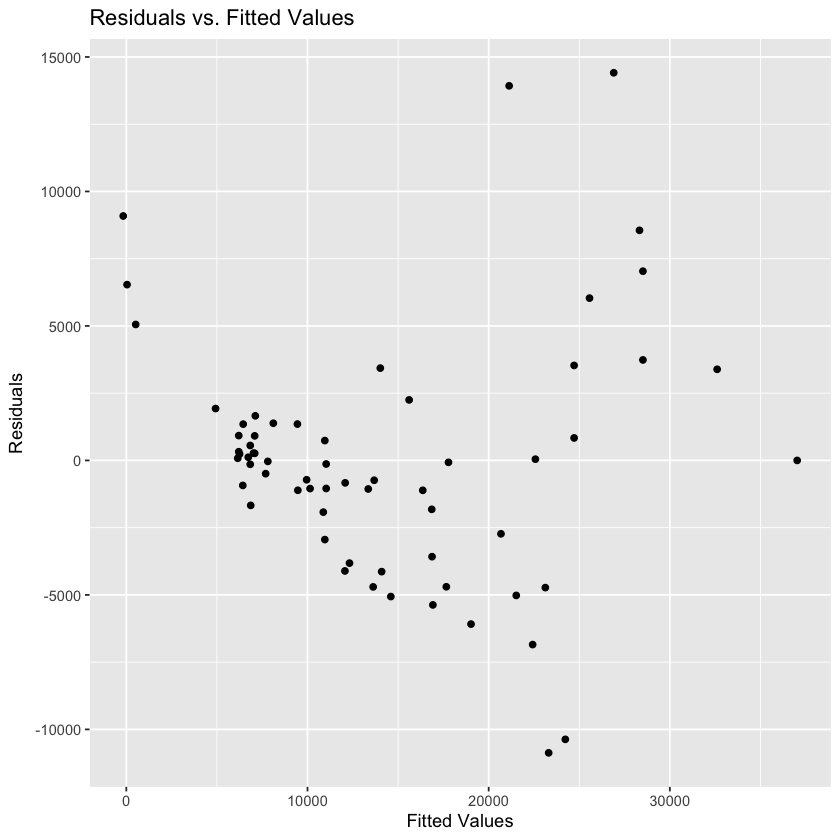

In [192]:
# check model assumption

residuals_data <- data.frame(
  Fitted = fitted(car_lm),
  Residuals = residuals(car_lm) 
)


ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point() +  
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs. Fitted Values")


Figure :  residuals vs fitted values

The residual plot suggests a violation for constant variance. The variance seems to increase as fitted value increases, so we decide to transform y.

In [201]:
car_lm <- lm(log(price) ~ fueltype + drivewheel + enginelocation + carlength  + doornumber + cylindernumber + citympg, data = car_model)
summary(car_lm)


Call:
lm(formula = log(price) ~ fueltype + drivewheel + enginelocation + 
    carlength + doornumber + cylindernumber + citympg, data = car_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56373 -0.10765 -0.00013  0.10993  0.65765 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.224335   1.371343   6.726 9.79e-09 ***
fueltype       -0.407638   0.126791  -3.215  0.00217 ** 
drivewheel      0.154551   0.062016   2.492  0.01569 *  
enginelocation  0.643071   0.252735   2.544  0.01373 *  
carlength       0.007517   0.005122   1.468  0.14778    
doornumber     -0.034785   0.073142  -0.476  0.63622    
cylindernumber  0.030935   0.048404   0.639  0.52537    
citympg        -0.056663   0.009452  -5.995 1.55e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2251 on 56 degrees of freedom
Multiple R-squared:  0.8568,	Adjusted R-squared:  0.839 
F-statistic: 47.88 on 7 and 56 DF,  p-

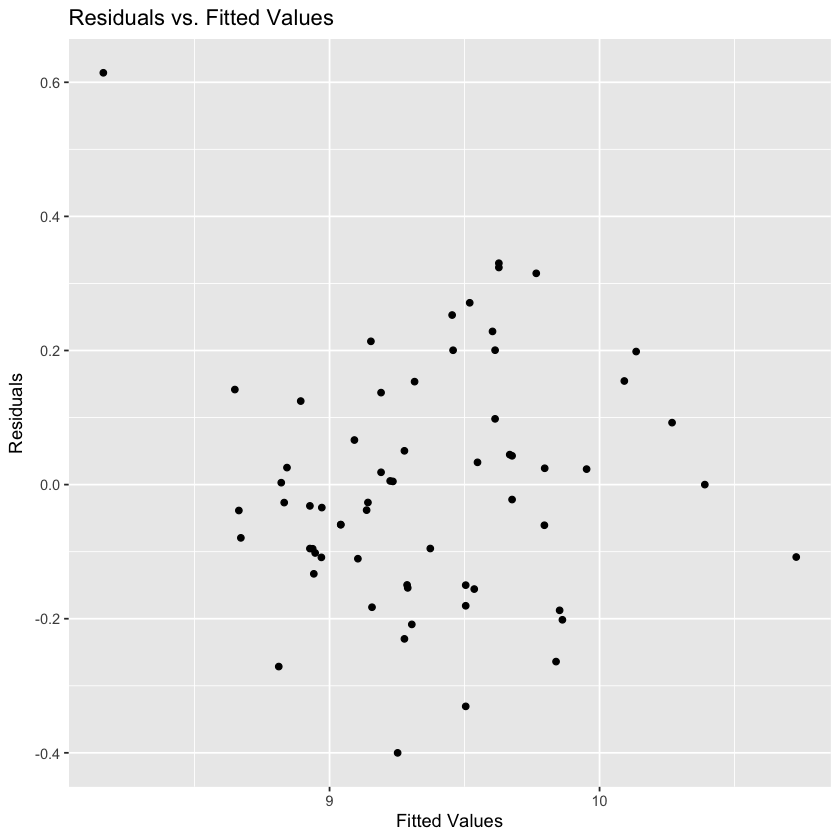

In [202]:

residuals_data <- data.frame(
  Fitted = fitted(final_car_lm),
  Residuals = residuals(final_car_lm)  
)


ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point() +  
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs. Fitted Values")


Figure : revised model residual plot


Now, the residual plot looks better and meets constant variance assumption.

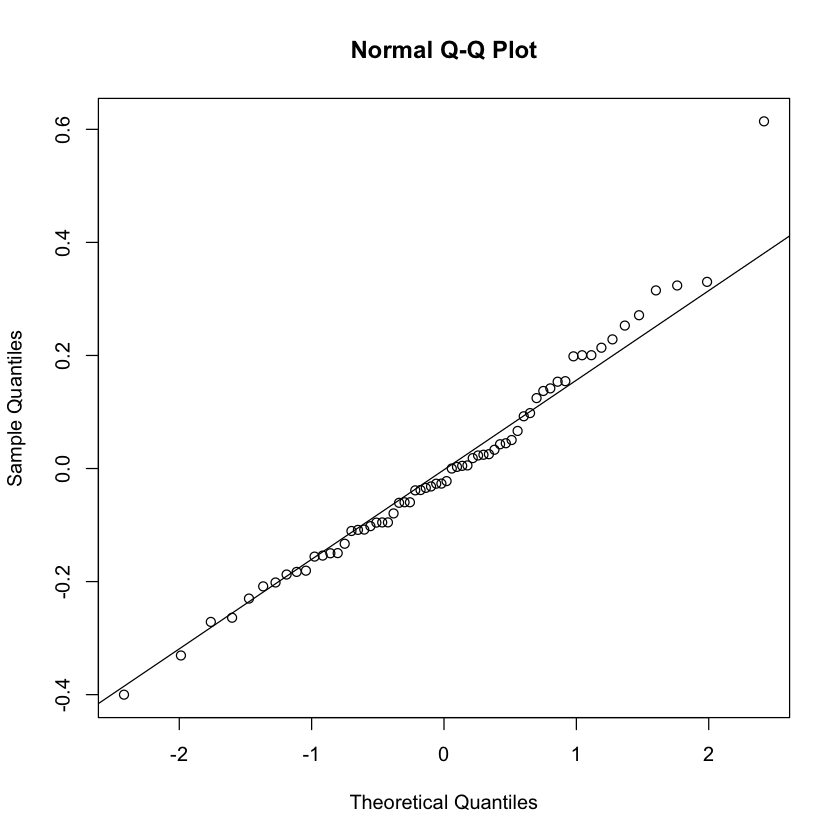

In [195]:

qqnorm(residuals_data$Residuals)
qqline(residuals_data$Residuals)

Figure : Normal QQ plot

The residuals do seem to follow a normal distribution. However, the deviation in the upper tail indicates potential issues with outliers or skewness.